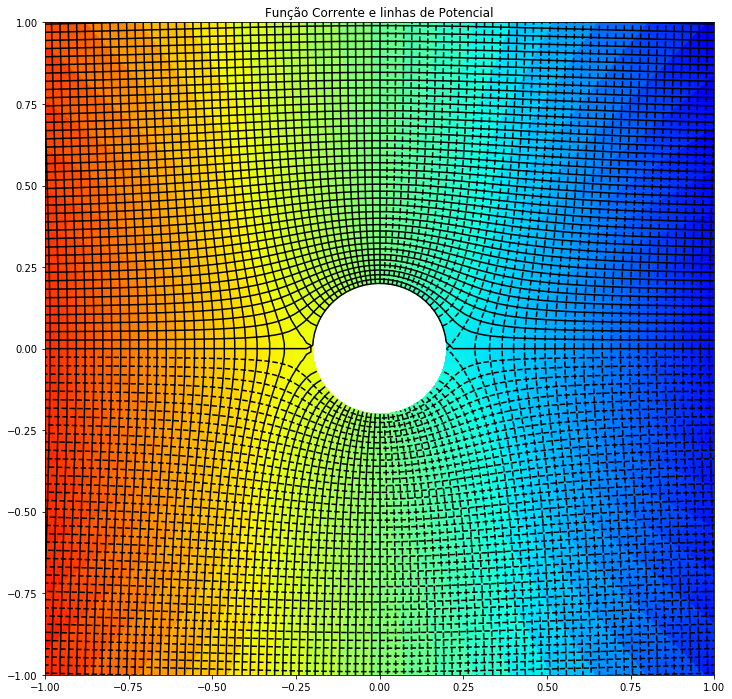

In [58]:
################################################################
## Disciplina de Mecânica dos Fluidos 2
## Exemplo de escoamento ao redor de um cilindro com rotação.
## Sua rotação é dada a partir da intensidade do dipolo, K.
## Os cálculos são feitos em coordenadas polares, mas os
## gráficos foram plotados em coordenadas cartesianas.
## Referência: Introdução à Mec. dos Fluidos - Fox et al.
################################################################

from numpy import pi, cos, sin, tan, log, sqrt
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def potencial(r, t, U=1.0, a=0.2, K=0.0):
    """Função potencial, conforme pag. 269 do Fox."""
    if K > 4*pi*U*a:
        K = 4*pi*U*a
    return -U*r*(1+pow(a/r,2))*cos(t)+K*t/(2*pi)

def corrente(r, t, U=1.0, a=0.2, K=0.0):
    """Função potencial, conforme pag. 269 do Fox."""
    if K > 4*pi*U*a:
        K = 4*pi*U*a
    return U*r*(1-pow(a/r,2))*sin(t)+K*log(r)/(2*pi)

Ro = 0.2 # Raio interno do cilindro
R  = sqrt(2.0) # Raio externo do domínio polar
Nr = 256 # Nùmero de pontos na direção r
Nr = 64 # Nùmero de pontos na direção theta

r = np.linspace(Ro, R, Nr)   # Os valores de r
t = np.linspace(0, 2*pi, Nt) # Os valores de theta
X, Y = np.meshgrid(r,t)      # A malha para plotar os valores
Zp = potencial(X, Y, a=Ro)
Zc = corrente(X, Y, a=Ro)

fig = plt.figure(figsize=(12, 12)) # Figura 12" x 12"
ax = fig.add_subplot(111) # Apenas uma figura

CS1 = ax.contour(X*cos(Y), X*sin(Y), Zp, 128, colors='k')
CS2 = ax.contour(X*cos(Y), X*sin(Y), Zc, 128, colors='k')

im = ax.pcolormesh(X*cos(Y), X*sin(Y), Zp, cmap=cm.jet)
plt.title('Função Corrente e linhas de Potencial')

plt.xlim([-1.0, 1.0])
plt.ylim([-1.0, 1.0])

plt.show()